In [10]:
from scipy import stats

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cursos-prouni-pb-jpa.csv')

In [3]:
df.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Administração,Bacharelado,Matutino,529.00,5.0,4.0,NaN,NaN,609.94,607.2,NaN,NaN
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Administração,Bacharelado,Curso a Distância,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN,NaN
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Administração,Bacharelado,Curso a Distância,298.00,NaN,NaN,1.0,NaN,NaN,NaN,547.8,NaN
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Noturno,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0,NaN
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Matutino,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0,NaN


In [4]:
df.tail()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
355,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Teologia,Bacharelado,Curso a Distância,189.00,NaN,NaN,1.0,NaN,NaN,NaN,568.88,NaN
356,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Teologia,Bacharelado,Curso a Distância,189.00,1.0,NaN,1.0,1.0,631.42,NaN,604.00,529.3
357,PB,Joao Pessoa,Universidade Cruzeiro do Sul - UNICSUL,"COESP - JOÃO PESSOA, PARAÍBA - Centro",Teologia,Bacharelado,Curso a Distância,256.86,NaN,NaN,1.0,NaN,NaN,NaN,561.42,NaN
358,PB,Joao Pessoa,Faculdade Paraíbana - FAP,CAMPUS - JOÃO PESSOA - MIRAMAR - Miramar,Turismo,Bacharelado,Noturno,474.27,2.0,1.0,NaN,NaN,580.22,558.24,NaN,NaN
359,PB,Joao Pessoa,Instituto Paraibano de Ensino Renovado - INPER,CAMPUS - JOÃO PESSOA - JARDIM MARIZÓPOLIS - J...,Turismo,Bacharelado,Noturno,560.89,2.0,1.0,NaN,NaN,591.16,548.48,NaN,NaN


In [5]:
df.columns

Index(['uf_busca', 'cidade_busca', 'universidade_nome', 'campus_nome', 'nome',
       'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas'],
      dtype='object')

In [6]:
df.shape

(360, 16)

In [7]:
df.nunique()

uf_busca                  1
cidade_busca              1
universidade_nome        29
campus_nome              34
nome                     82
grau                      3
turno                     5
mensalidade             183
bolsa_integral_cotas     11
bolsa_integral_ampla     14
bolsa_parcial_cotas       3
bolsa_parcial_ampla      17
nota_integral_ampla     290
nota_integral_cotas     207
nota_parcial_ampla       74
nota_parcial_cotas        7
dtype: int64

In [8]:
df.mensalidade.max()

np.float64(8350.0)

In [9]:
df.mensalidade.min()

np.float64(149.0)

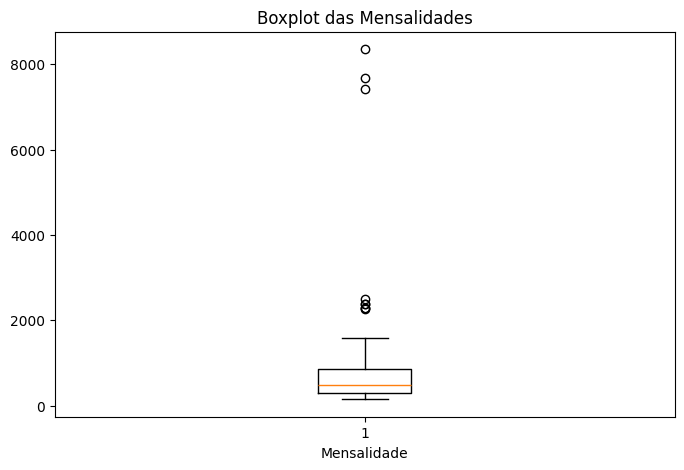

In [18]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['mensalidade'], vert=True)
plt.title('Boxplot das Mensalidades')
plt.xlabel('Mensalidade')
plt.show()

In [12]:
df['zscore'] = np.abs(stats.zscore(df.mensalidade))

In [15]:
df[(df.zscore > 3) | (df.zscore < -3)].head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,zscore
281,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Medicina,Bacharelado,Integral,7686.0,5.0,4.0,NaN,NaN,764.32,743.76,NaN,NaN,9.287521
282,PB,Joao Pessoa,Faculdade de Ciências Médicas da Paraíba - FCM-PB,LADEIRA DE S FRANCISCO - Centro,Medicina,Bacharelado,Integral,7412.7,8.0,5.0,5.0,3.0,754.98,733.60,748.78,727.58,8.926079
283,PB,Joao Pessoa,Faculdade de Medicina Nova Esperança - FAMENE,CAMPUS - JOÃO PESSOA - Gramame,Medicina,Bacharelado,Integral,8350.0,4.0,3.0,NaN,NaN,759.76,736.94,NaN,NaN,10.165669


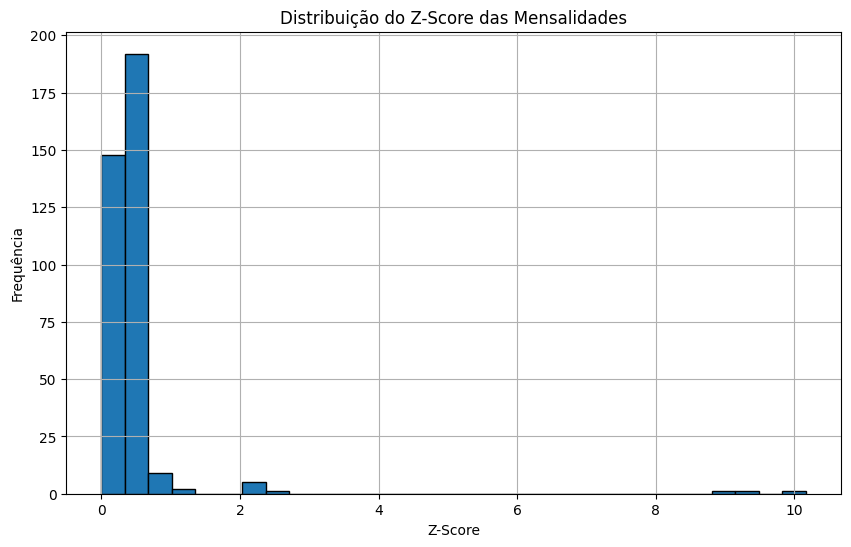

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['zscore'], bins=30, edgecolor='black')
plt.title('Distribuição do Z-Score das Mensalidades')
plt.xlabel('Z-Score')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [19]:
df.isna().sum()

uf_busca                  0
cidade_busca              0
universidade_nome         0
campus_nome               0
nome                      0
grau                      0
turno                     0
mensalidade               0
bolsa_integral_cotas     64
bolsa_integral_ampla    149
bolsa_parcial_cotas     307
bolsa_parcial_ampla     307
nota_integral_ampla      64
nota_integral_cotas     150
nota_parcial_ampla      261
nota_parcial_cotas      353
zscore                    0
dtype: int64

In [20]:
df_na = df.dropna()
df_na.isna().sum()

uf_busca                0
cidade_busca            0
universidade_nome       0
campus_nome             0
nome                    0
grau                    0
turno                   0
mensalidade             0
bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
nota_integral_ampla     0
nota_integral_cotas     0
nota_parcial_ampla      0
nota_parcial_cotas      0
zscore                  0
dtype: int64

In [21]:
df.shape

(360, 17)

In [22]:
df_na.shape

(1, 17)

In [23]:
df_fna = df.fillna(0)
df_fna.isna().sum()

uf_busca                0
cidade_busca            0
universidade_nome       0
campus_nome             0
nome                    0
grau                    0
turno                   0
mensalidade             0
bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
nota_integral_ampla     0
nota_integral_cotas     0
nota_parcial_ampla      0
nota_parcial_cotas      0
zscore                  0
dtype: int64

In [24]:
df_fna.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,zscore
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Administração,Bacharelado,Matutino,529.00,5.0,4.0,0.0,0.0,609.94,607.2,0.0,0.0,0.177694
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Administração,Bacharelado,Curso a Distância,298.00,1.0,0.0,0.0,0.0,582.64,0.0,0.0,0.0,0.483195
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Administração,Bacharelado,Curso a Distância,298.00,0.0,0.0,1.0,0.0,0.00,0.0,547.8,0.0,0.483195
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Noturno,864.67,0.0,0.0,0.0,100.0,0.00,0.0,450.0,0.0,0.266233
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Matutino,864.67,0.0,0.0,0.0,100.0,0.00,0.0,450.0,0.0,0.266233
